In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("../data/student_performance_data.csv")

In [7]:
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
df[categorical_columns] = df[categorical_columns].astype('category')

In [22]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
"""
StudentID: A unique identifier assigned to each student (1001 to 3392).

Demographic Details

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher

Study Habits

StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

Absences: Number of absences during the school year, ranging from 0 to 30.

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement

ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High

Extracurricular Activities

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

Academic Performance

GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

Target Variable: Grade Class
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)
"""

In [8]:
# Basic information and summary statistics
print("Basic Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   StudentID          2392 non-null   int64   
 1   Age                2392 non-null   int64   
 2   Gender             2392 non-null   category
 3   Ethnicity          2392 non-null   category
 4   ParentalEducation  2392 non-null   category
 5   StudyTimeWeekly    2392 non-null   float64 
 6   Absences           2392 non-null   int64   
 7   Tutoring           2392 non-null   category
 8   ParentalSupport    2392 non-null   category
 9   Extracurricular    2392 non-null   category
 10  Sports             2392 non-null   category
 11  Music              2392 non-null   category
 12  Volunteering       2392 non-null   category
 13  GPA                2392 non-null   float64 
 14  GradeClass         2392 non-null   category
dtypes: category(10), float64(2), int64(3

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


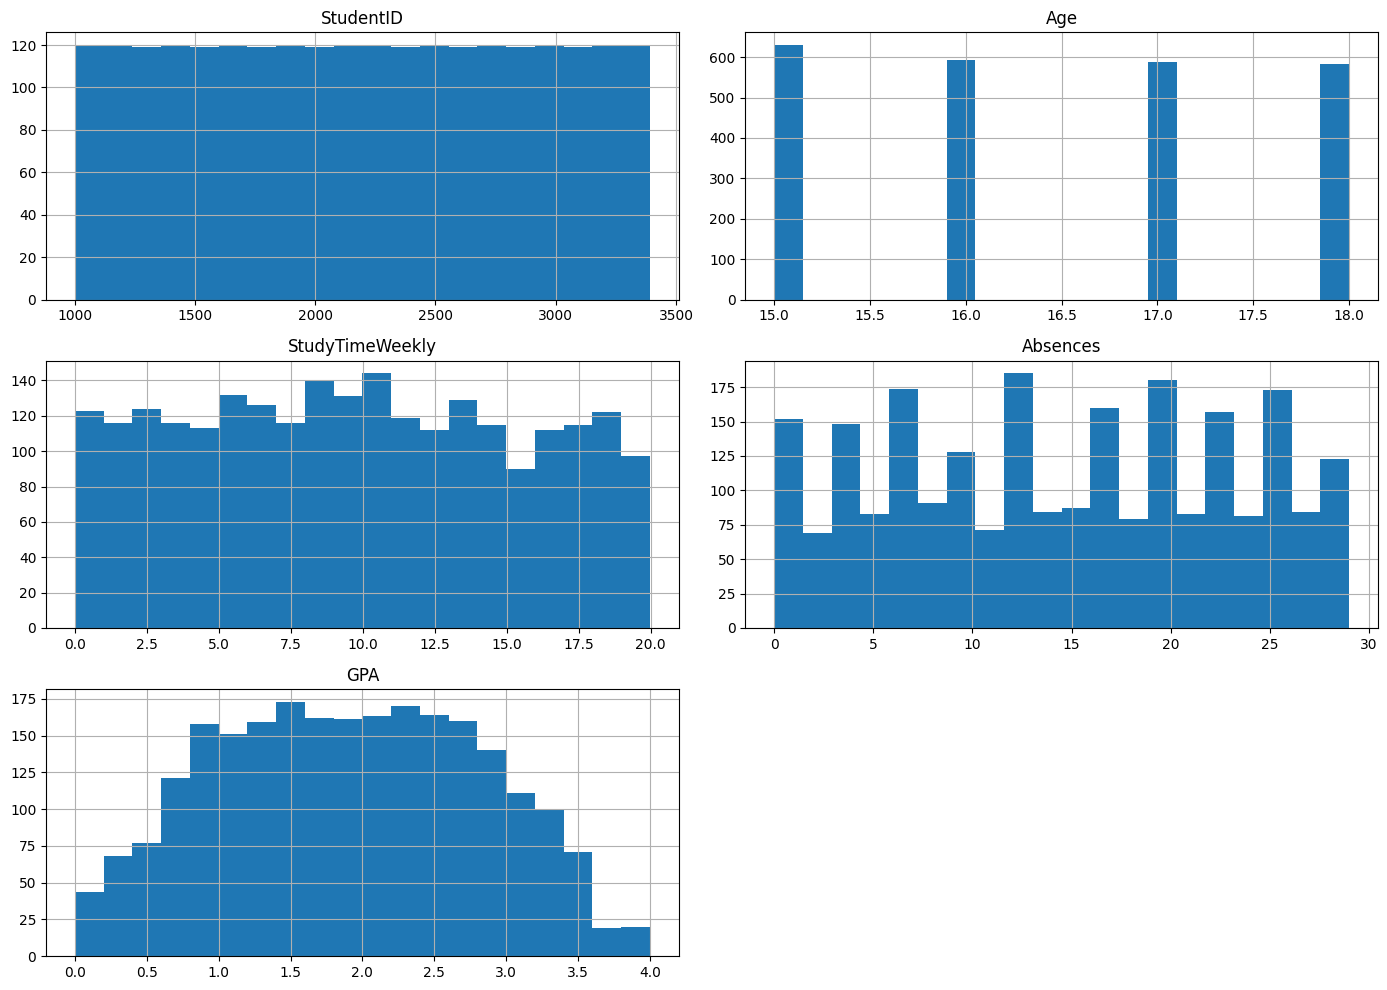

In [12]:
# Distribution of numerical features
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

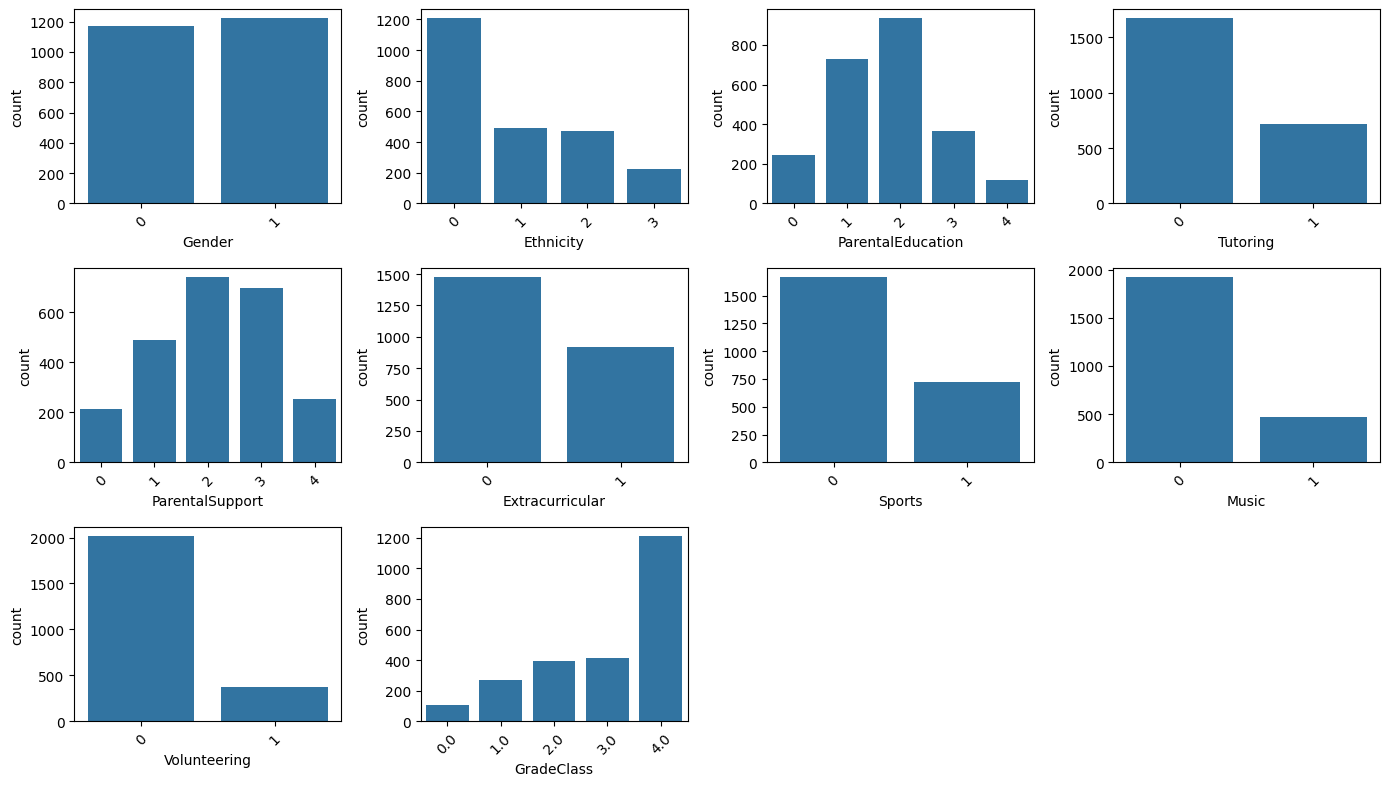

In [15]:
# Distribution of categorical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

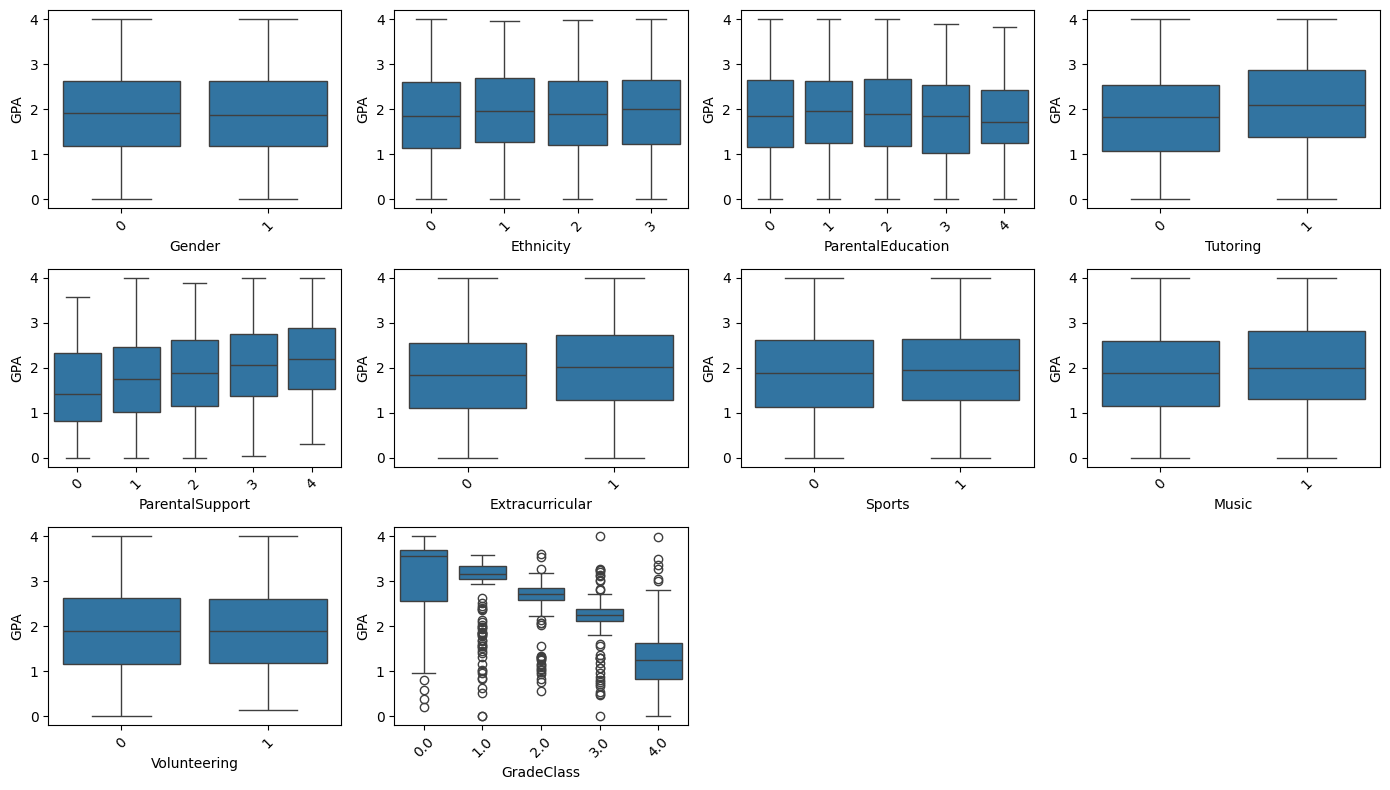

In [17]:
# Box plots for GPA by categorical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col, y='GPA')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

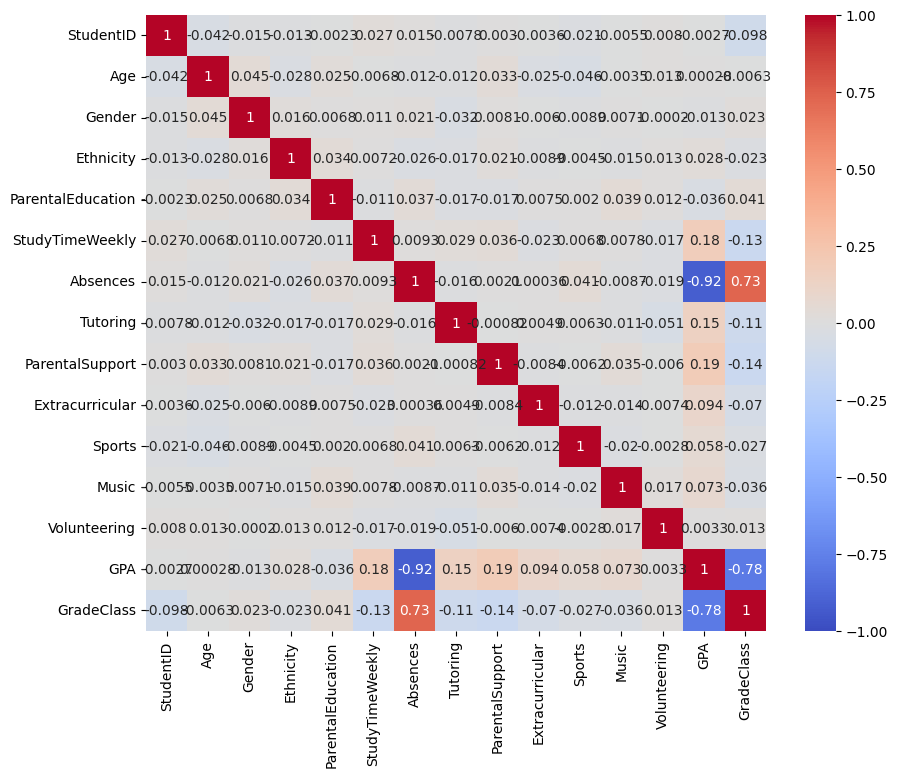

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Strong correlation between Absence and student's GPA. Even stronger than between GPA and GradeClass

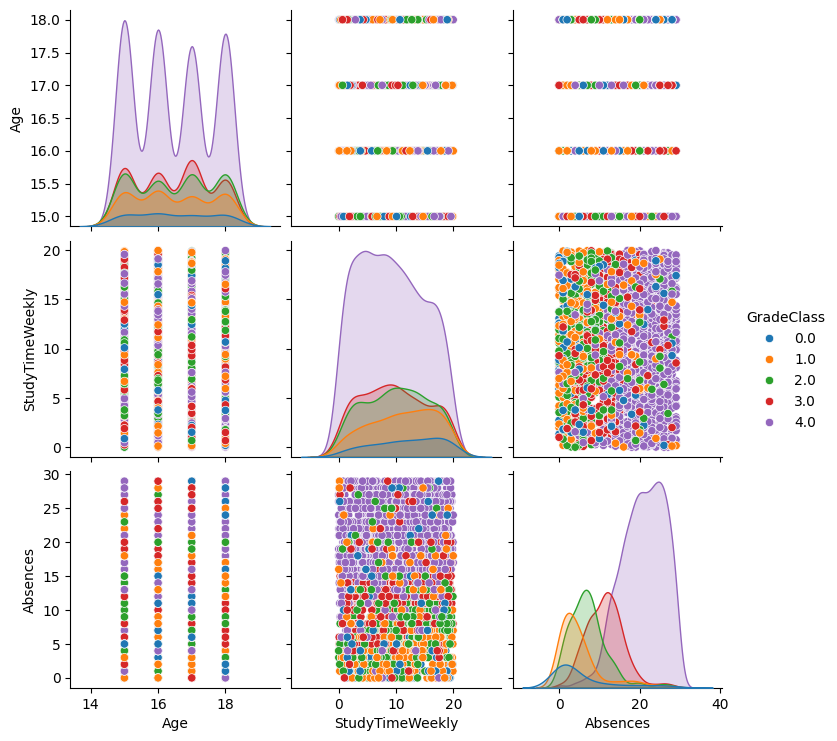

In [26]:
# Pairplot to show relationships
sns.pairplot(df, hue='GradeClass', vars=['Age', 'StudyTimeWeekly', 'Absences'])
plt.show()

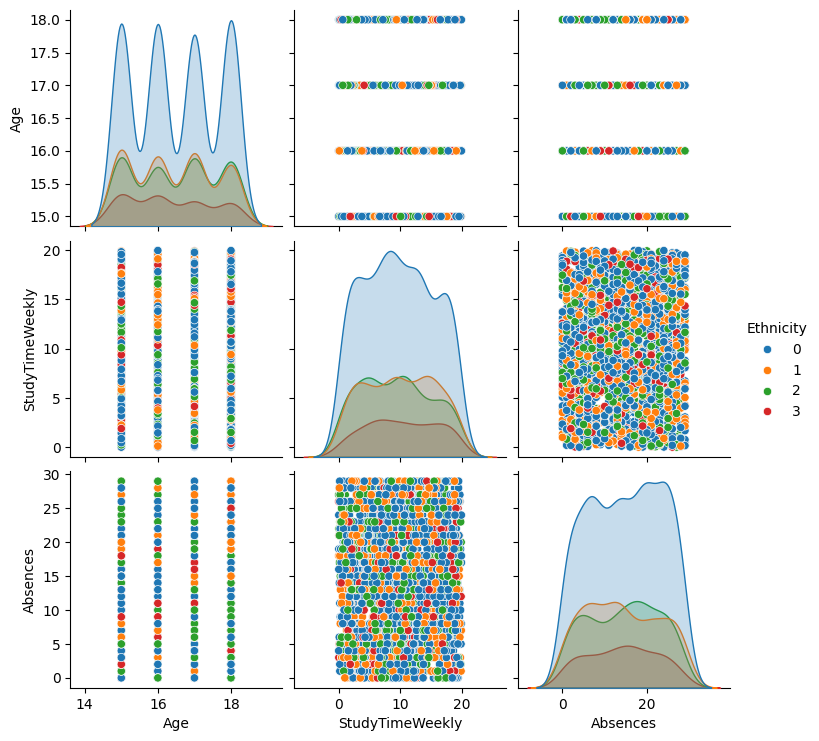

In [27]:
# Pairplot to show relationships
sns.pairplot(df, hue='Ethnicity', vars=['Age', 'StudyTimeWeekly', 'Absences'])
plt.show()

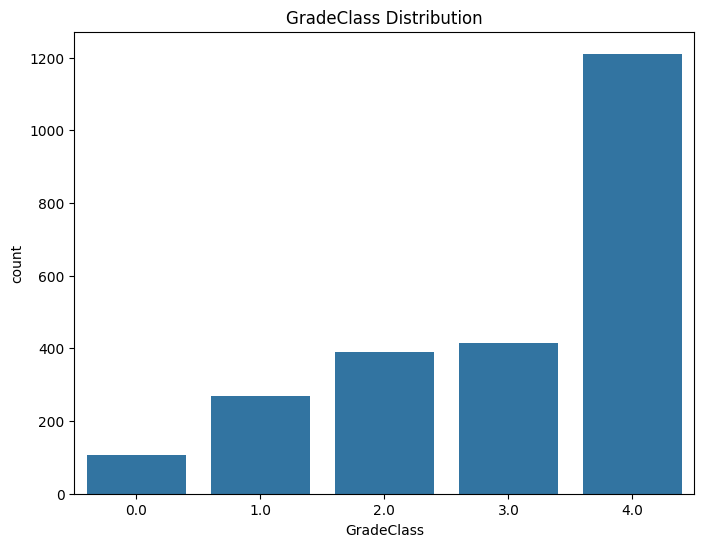

In [28]:
# Count plot for GradeClass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GradeClass')
plt.title('GradeClass Distribution')
plt.show()

Our target is GradeClass
All other features except for the GPA which directly informs about the GradeClass with serve us as input features.

In [32]:
CATEGORICAL_COLS = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]
NUM_COLS = ["Age", "StudyTimeWeekly"]
TARGET = "GradeClass"

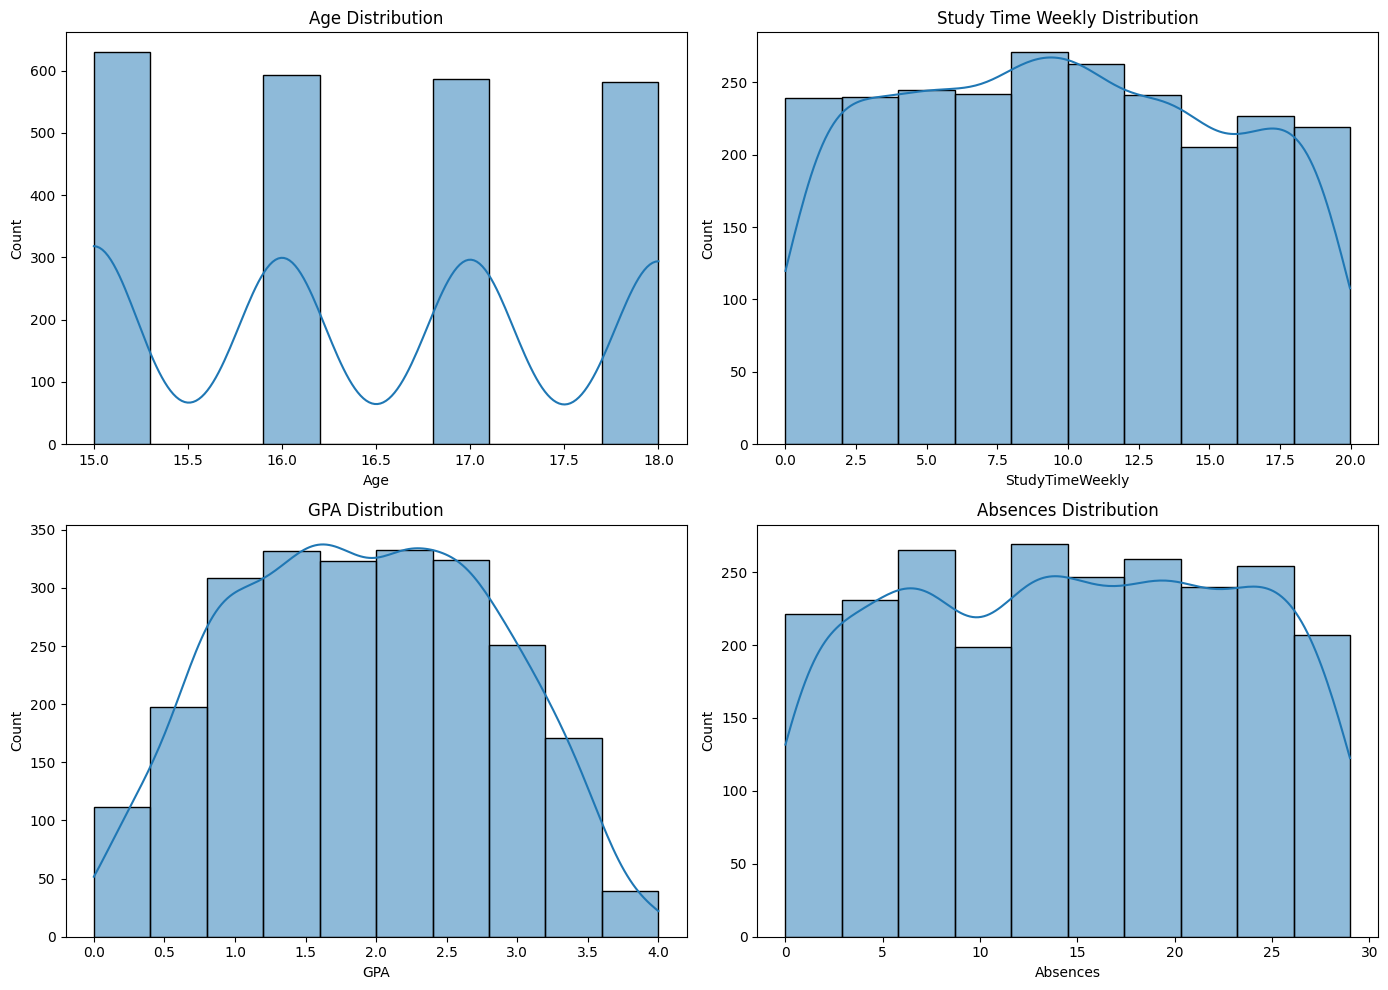

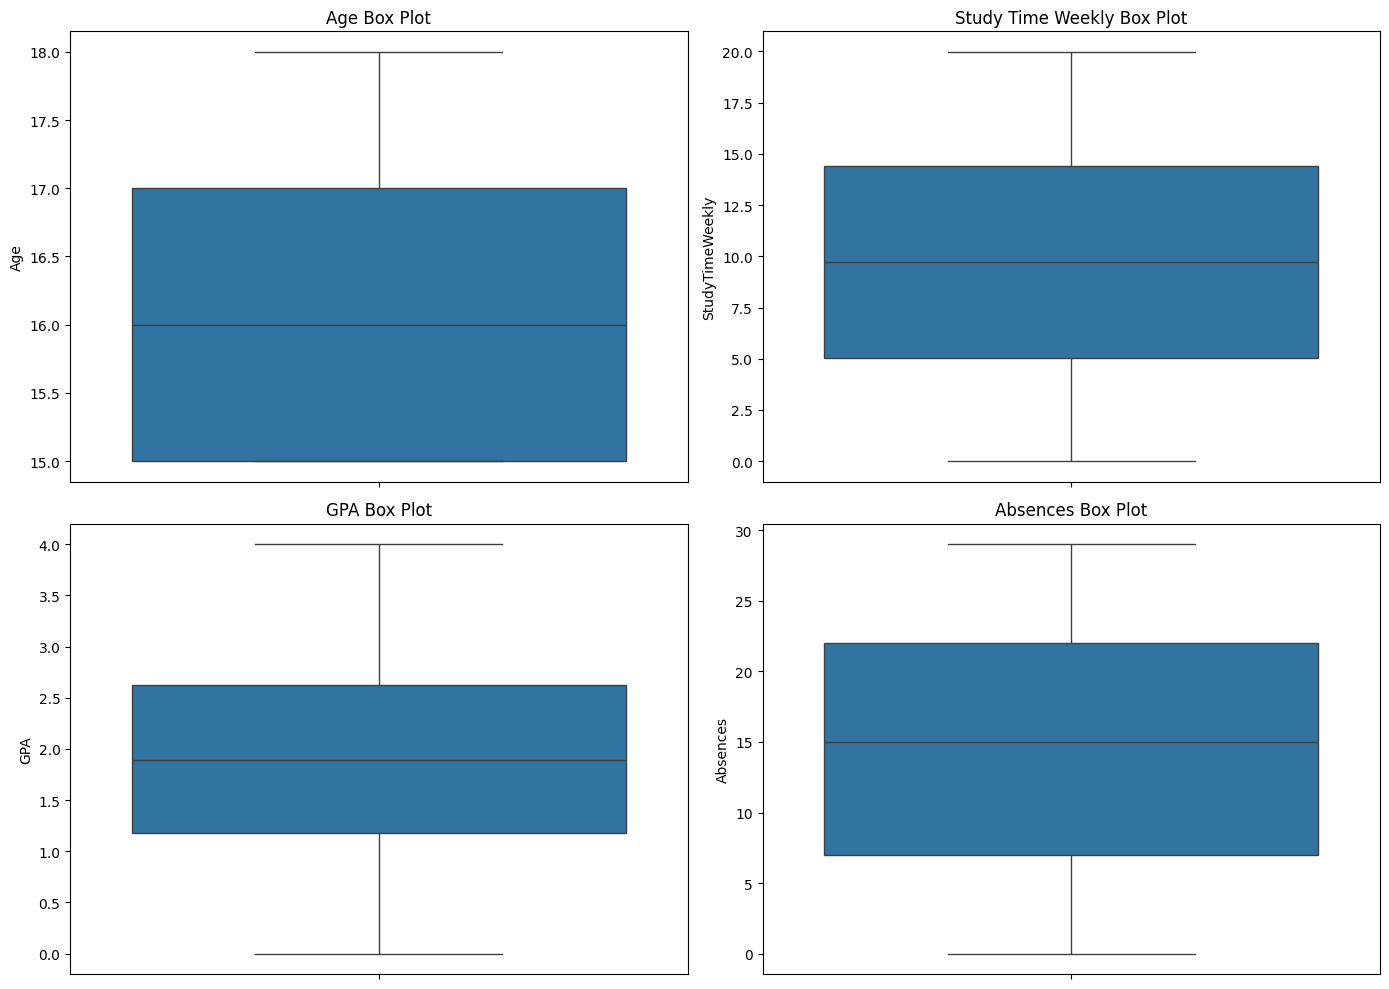

In [33]:
# Plot distributions using seaborn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# StudyTimeWeekly distribution
sns.histplot(df['StudyTimeWeekly'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Study Time Weekly Distribution')

# GPA distribution
sns.histplot(df['GPA'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('GPA Distribution')

# Absences distribution
sns.histplot(df['Absences'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Absences Distribution')

plt.tight_layout()
plt.show()

# Box plots to visualize spread and outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age box plot
sns.boxplot(y=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Box Plot')

# StudyTimeWeekly box plot
sns.boxplot(y=df['StudyTimeWeekly'], ax=axes[0, 1])
axes[0, 1].set_title('Study Time Weekly Box Plot')

# GPA box plot
sns.boxplot(y=df['GPA'], ax=axes[1, 0])
axes[1, 0].set_title('GPA Box Plot')

# Absences box plot
sns.boxplot(y=df['Absences'], ax=axes[1, 1])
axes[1, 1].set_title('Absences Box Plot')

plt.tight_layout()
plt.show()

No values seem specifically abnormal and thus we jump to creating our model